<h1 align="center">Formatos de datos</font></h1>

**CSV**

Comma Separated Values (valores separados por comas). Requiere que cada 
elemento de nuestro conjunto se presente en una línea. Dentro de esa línea, cada uno 
de los atributos del elemento debe estar separado por un único separador, que 
habitualmente es una coma, y seguir siempre el mismo orden. Además, la primera 
línea del fichero, a la que llamaremos cabecera, no contiene datos de ningún 
elemento, sino información de los atributos. Si el campo contiene alguna coma, 
utilizaremos un delimitador como por ejemplo " ".
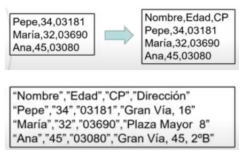

XML

Extensive Markup Languaje (lenguaje de marcas extensible). Es un lenguaje de 
etiquetas utilizado para almacenar datos de forma estructurada.
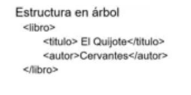

JSON

JavaScript Object Notation, es un formato muy utilizado hoy en día, tiene el mismo 
propósito que el XML que es el intercambio de datos pero no utiliza las etiquetas 
abiertas y cerradas, sino que pretende que pese menos, es decir que ocupe menos 
espacio.

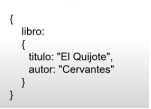

Avro

Es un formato de almacenamiento basado en filas para Hadoop. Avro se basa 
en esquemas. Cuando los datos .avro son leídos siempre está presente el esquema 
con el que han sido escritos. Avro utiliza JSON para definir tipos de datos y 
protocolos. Es el formato utilizado para la serialización de datos ya que es más rápido 
y ocupa menos espacio que los JSON, la serialización de los datos la hace en un 
formato binario compacto.

Parquet

Es un formato de almacenamiento basado en columnas para Hadoop. Fue creado 
para poder disponer de un formato de compresión y codificación eficiente. El formato 
Parquet está compuesto por tres piezas:

• Row group: es un conjunto de filas en formato columnar.

• Column chunk: son los datos de una columna en grupo. Se puede leer de 
manera independiente para mejorar las lecturas.

• Page: es donde finalmente se almacenan los datos, debe ser lo 
suficientemente grade para que la compresión sea eficiente.


<h1 align="center">Formatos de datos a detalle</font></h1>

En el procesamiento de datos mediante herramientas como Hadoop o Spark, es esencial escoger un formato de archivo adecuado para facilitar la gestión de los datos en distintos pipelines. Los formatos de datos deben ser:

- Independientes del lenguaje
- Expresivos, con soporte para estructuras complejas
- Eficientes y ligeros en tamaño
- Dinámicos para adaptarse a nuevos tipos de datos
- Autónomos y divisibles para facilitar la compresión y el procesamiento paralelo

Existen dos tipos principales de formatos de almacenamiento:

1. **Texto**: como CSV, XML y JSON, que son más lentos y ocupan más espacio, pero permiten una mejor interoperabilidad.
2. **Binarios**: como Avro, Parquet y ORC, que ofrecen mejor rendimiento y ocupan menos espacio, aunque son menos expresivos.

Elegir el formato adecuado mejora el rendimiento, facilita la división del archivo en fragmentos (splittable), y permite la compresión y la evolución de esquemas para el almacenamiento eficiente de datos.

<h1 align="center">Filas vs columnas</font></h1>

Los formatos con los que estamos más familiarizados, como son CSV, XML o JSON, 
son formatos basados en filas, donde cada registro se almacena en una fila o 
documento. Estos formatos son más lentos en ciertas consultas y su almacenamiento 
no es óptimo.

JSON VS JSONL

Un documento JSON contiene diferentes pares de clave-valor con los elementos que 
lo componen ocupando varias líneas.
Un tipo específico de JSON es JSON (JSON Lines), el cual almacena una secuencia de 
objetos JSON delimitando cada objeto por un saldo de línea.

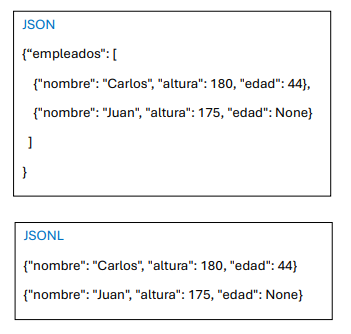

En un formato basado en columnas, cada columna se almacena en su conjunto de 
ficheros, es decir, cada registro almacena toda la información de una columna. Al 
basarse en columnas, ofrece mejor rendimiento para consultas de determinadas 
columnas y/o agregaciones, y el almacenamiento es más óptimo (como todos los 
datos de una columna son del mismo tipo, la compresión es mayor).

Supongamos que tenemos los siguientes datos:


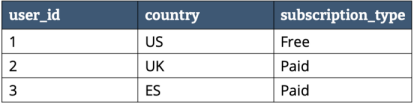

Dependiendo del almacenamiento en filas o columnas tendríamos la siguiente 
representación:

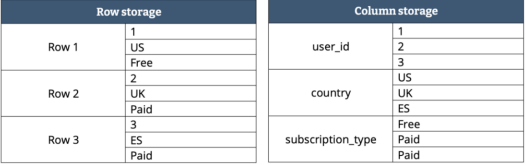

Como hemos comentado previamente, en un formato columnar los datos del mismo 
tipo se agrupan, lo que mejora el rendimiento de acceso y reduce el tamaño:

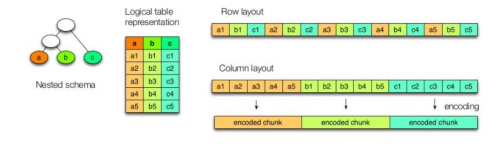

El almacenamiento en columnas y la compresión de datos tienen desventajas en el acceso y actualización de registros individuales. Para acceder a un registro, se necesita reconstruirlo a partir de varias columnas, lo cual implica leer múltiples archivos. Además, actualizar un registro requiere descomprimir, modificar, recomprimir y escribir nuevamente el archivo, lo que incrementa la carga computacional.

Para reducir este impacto, se utilizan estrategias de particionado y clustering, organizando las columnas en archivos más pequeños según los patrones de consulta. Sin embargo, este enfoque sigue siendo ineficiente para actualizaciones individuales, por lo que las bases de datos columnares no son ideales para cargas de trabajo transaccionales (OLTP), donde se prefiere el almacenamiento orientado a filas.

<h1 align="center">Tamaño</font></h1>

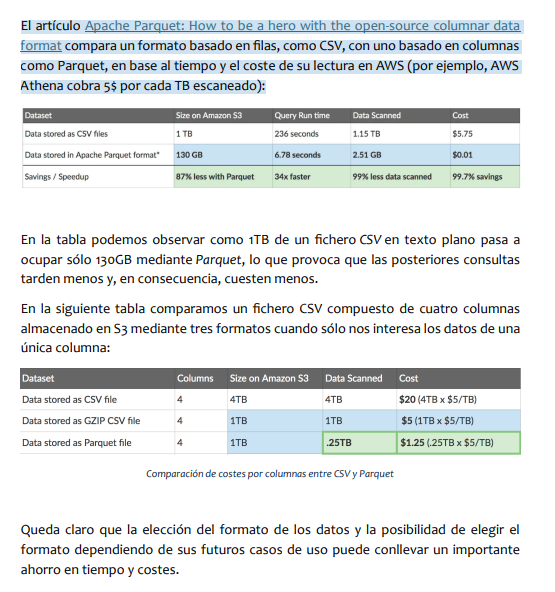

<h1 align="center">Avro</font></h1>

Apache Avro es un formato de almacenamiento basado en filas, que ofrece mayor velocidad y ocupa menos espacio que JSON, gracias a la serialización en un formato binario compacto con metadatos de esquema en JSON. Avro soporta la compresión de bloques y permite dividir datos en fragmentos, lo cual lo hace ideal para el ecosistema de Hadoop y compatible con la mayoría de herramientas en la nube.

El formato de Avro se basa en esquemas definidos en JSON, que describen los tipos de datos y protocolos. Cada archivo .avro almacena el esquema en su cabecera, seguido de los datos en binario. Los esquemas de Avro incluyen tipos primitivos (como boolean, int, string) y compuestos (como record, array, map).

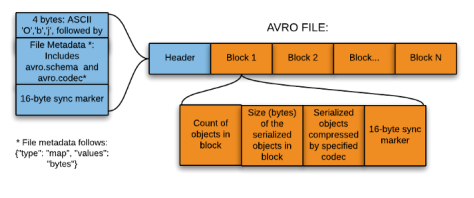